In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data_to_predict = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv').drop(['Id'], axis=1)
data.shape

target_name = 'SalePrice'

In [3]:
p25 = data[target_name].quantile(0.25)
p75 = data[target_name].quantile(0.75)
iqr = p75 - p25
up_lim = p75 + 1.5*iqr
low_lim = p25 - 1.5*iqr

# index_drop = []
# index_drop_up = data[data[target_name] > up_lim].index
# index_drop_low = data[data[target_name] < low_lim].index
# index_drop = list(index_drop_up) + list(index_drop_low)
# data.drop(index_drop, inplace=True)

target = data[target_name]
data.drop(["Id", target_name], axis=1, inplace=True)
# data.drop(["Id"], axis=1, inplace=True)

In [4]:
col_with_nulls = []
test_col_with_nulls = []

for column in data.columns:
    if data[column].isnull().values.any():
        col_with_nulls.append(column)
        print(('Values missing in {} - {}').format(column, data[column].isnull().sum()))

print('-------------------------------')

for column in data_to_predict.columns:
    if data_to_predict[column].isnull().values.any():
        test_col_with_nulls.append(column)
        print(('Values missing in {} - {}').format(column, data_to_predict[column].isnull().sum()))  

Values missing in LotFrontage - 259
Values missing in Alley - 1369
Values missing in MasVnrType - 8
Values missing in MasVnrArea - 8
Values missing in BsmtQual - 37
Values missing in BsmtCond - 37
Values missing in BsmtExposure - 38
Values missing in BsmtFinType1 - 37
Values missing in BsmtFinType2 - 38
Values missing in Electrical - 1
Values missing in FireplaceQu - 690
Values missing in GarageType - 81
Values missing in GarageYrBlt - 81
Values missing in GarageFinish - 81
Values missing in GarageQual - 81
Values missing in GarageCond - 81
Values missing in PoolQC - 1453
Values missing in Fence - 1179
Values missing in MiscFeature - 1406
-------------------------------
Values missing in MSZoning - 4
Values missing in LotFrontage - 227
Values missing in Alley - 1352
Values missing in Utilities - 2
Values missing in Exterior1st - 1
Values missing in Exterior2nd - 1
Values missing in MasVnrType - 16
Values missing in MasVnrArea - 15
Values missing in BsmtQual - 44
Values missing in BsmtC

In [5]:
print(f'col_with_nulls = {col_with_nulls}')
print('---------------------')
print(f'test_col_with_nulls = {test_col_with_nulls}')

col_with_nulls = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
---------------------
test_col_with_nulls = ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [6]:
col_with_NA_cat = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                   'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
test_col_with_NA_cat = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in col_with_NA_cat:
    data[col].replace(np.nan, 'NA', inplace=True)


for col in test_col_with_NA_cat:
    data_to_predict[col].replace(np.nan, 'NA', inplace=True)


for column in data.columns:
    if data[column].isnull().values.any():
        print(('Values missing in {} - {}').format(column, data[column].isnull().sum()))


print('-------------------------------')
for column in data_to_predict.columns:
    if data_to_predict[column].isnull().values.any():
        print(('Values missing in {} - {}').format(column, data_to_predict[column].isnull().sum()))  

Values missing in LotFrontage - 259
Values missing in MasVnrArea - 8
Values missing in Electrical - 1
Values missing in GarageYrBlt - 81
-------------------------------
Values missing in MSZoning - 4
Values missing in LotFrontage - 227
Values missing in Utilities - 2
Values missing in Exterior1st - 1
Values missing in Exterior2nd - 1
Values missing in MasVnrArea - 15
Values missing in BsmtFinSF1 - 1
Values missing in BsmtFinSF2 - 1
Values missing in BsmtUnfSF - 1
Values missing in TotalBsmtSF - 1
Values missing in BsmtFullBath - 2
Values missing in BsmtHalfBath - 2
Values missing in KitchenQual - 1
Values missing in Functional - 2
Values missing in GarageYrBlt - 78
Values missing in GarageCars - 1
Values missing in GarageArea - 1
Values missing in SaleType - 1


In [7]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['GarageYrBlt'].fillna(data['YrSold'], inplace=True)

data_to_predict['GarageYrBlt'].fillna(data_to_predict['YrSold'], inplace=True)

for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']:
    data_to_predict[col] = data_to_predict[col].fillna(0)

for col in ['Utilities', 'Exterior1st', 'Exterior2nd','KitchenQual','Functional', 'SaleType']:
    data_to_predict[col] = data_to_predict[col].fillna(data_to_predict[col].mode()[0])


#replace garage values acc to Detchd type
data_to_predict['GarageCars'] = data_to_predict['GarageCars'].fillna(data_to_predict.loc[data_to_predict['GarageType'] == 'Detchd', 'GarageCars'].mode()[0])
data_to_predict['GarageArea'] = data_to_predict['GarageArea'].fillna(data_to_predict.loc[(data_to_predict['GarageType'] == 'Detchd') & (data_to_predict['GarageCars'] == 1.0), 'GarageArea'].mode()[0])

In [8]:
display(data_to_predict.loc[data_to_predict['MSZoning'].isnull(), 'LotArea'])
display(data_to_predict.loc[data_to_predict['MSZoning'].isnull(), 'LotArea'].describe())
display(data_to_predict.groupby('MSZoning')['LotArea'].describe())

455     21780
756     14584
790     56600
1444    31250
Name: LotArea, dtype: int64

count        4.000000
mean     31053.500000
std      18347.611171
min      14584.000000
25%      19981.000000
50%      26515.000000
75%      37587.500000
max      56600.000000
Name: LotArea, dtype: float64

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),15.0,7533.666667,2416.430504,3300.0,5670.0,8250.0,9000.00,12366.0
FV,74.0,6470.743243,3213.898503,2117.0,3517.0,7250.5,8640.00,13162.0
RH,10.0,7708.700000,2455.633933,4113.0,6111.0,6815.0,9543.25,11622.0
RL,1114.0,10753.766607,4703.282597,1700.0,8250.0,9995.0,12188.25,51974.0
RM,242.0,6418.673554,3381.854064,1470.0,4250.5,6120.0,8603.00,33120.0


In [9]:
data_to_predict['MSZoning'] = data_to_predict['MSZoning'].fillna('RL')
data_to_predict['MSZoning'] = data_to_predict['MSZoning'].replace(['C (all)'], 'C')
print(data_to_predict['MSZoning'].unique())

['RH' 'RL' 'RM' 'FV' 'C']


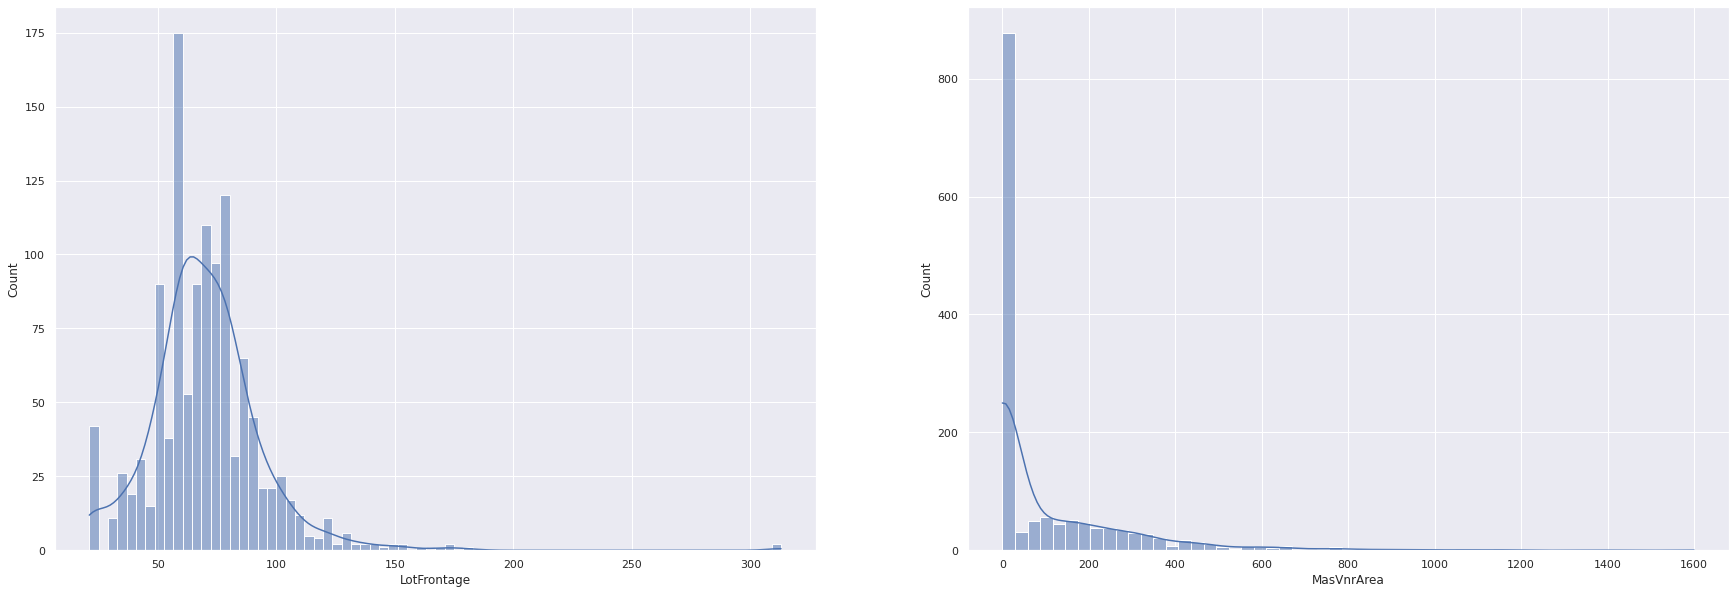

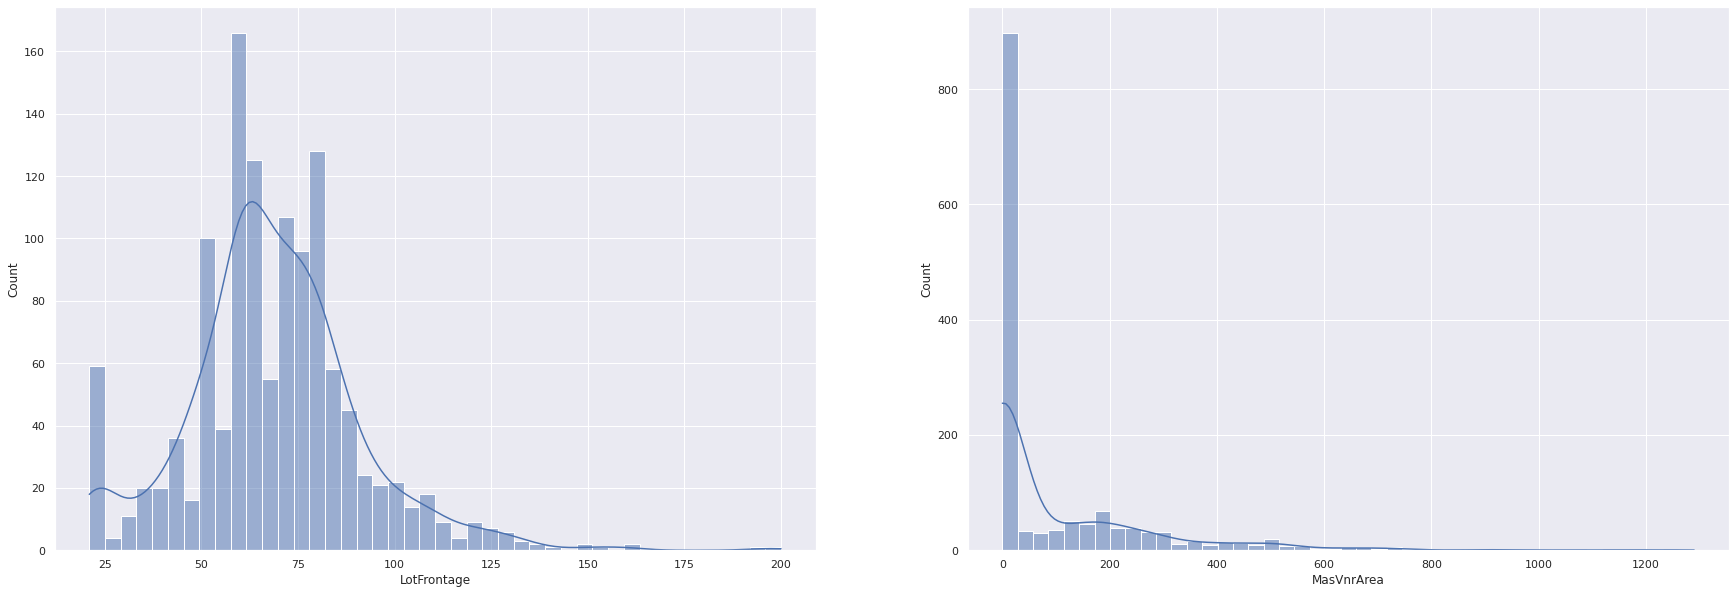

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.histplot(data['LotFrontage'], kde=True)
plt.subplot(1, 2, 2)
sns.histplot(data['MasVnrArea'], kde=True)
plt.show()

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.histplot(data_to_predict['LotFrontage'], kde=True)
plt.subplot(1, 2, 2)
sns.histplot(data_to_predict['MasVnrArea'], kde=True)
plt.show()

In [11]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])

data_to_predict['LotFrontage'] = data_to_predict['LotFrontage'].fillna(data_to_predict['LotFrontage'].mode()[0])
data_to_predict['MasVnrArea'] = data_to_predict['MasVnrArea'].fillna(data_to_predict['MasVnrArea'].mode()[0])

In [12]:
for column in data.columns:
    if data[column].isnull().values.any():
        print(('Values missing in {} - {}').format(column,
                                                   data[column].isnull().sum()))

print('-------------')
for column in data_to_predict.columns:
    if data_to_predict[column].isnull().values.any():
        print(('Values missing in {} - {}').format(column,
                                                   data_to_predict[column].isnull().sum()))

-------------


In [13]:
data['Remodeling_Age'] = data['YrSold'] - data['YearRemodAdd']
data['HomeAge'] = data['YrSold'] - data['YearBuilt']
data['Garage_Age'] = data['YrSold'] - data['GarageYrBlt']

data_to_predict['Remodeling_Age'] = data_to_predict['YrSold'] - data_to_predict['YearRemodAdd']
data_to_predict['HomeAge'] = data_to_predict['YrSold'] - data_to_predict['YearBuilt']
data_to_predict['Garage_Age'] = data_to_predict['YrSold'] - data_to_predict['GarageYrBlt']

print(data.shape)
print(data_to_predict.shape)

(1460, 82)
(1459, 82)


In [14]:
from sklearn.compose import make_column_selector as selector

num_col_selector = selector(dtype_exclude=object)
cat_col_selector = selector(dtype_include=object)

num_cols_check = num_col_selector(data)
cat_cols_check = cat_col_selector(data)

quant_to_predict_check = num_col_selector(data_to_predict)
cat_to_predict_check = cat_col_selector(data_to_predict)

print(f'num_cols_check = {num_cols_check}', len(num_cols_check))
print('####')
print(f'cat_cols_check = {cat_cols_check}', len(cat_cols_check))
print('-----------------------------------------------------')
print(f'quant_to_predict = {quant_to_predict_check}', len(quant_to_predict_check))
print('####')
print(f'cat_to_predict = {cat_to_predict_check}', len(cat_to_predict_check))

num_cols_check = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Remodeling_Age', 'HomeAge', 'Garage_Age'] 39
####
cat_cols_check = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual'

In [15]:
convert_dict = {'MSSubClass': 'object', 'OverallQual': 'object',
                'OverallCond': 'object', 'MoSold': 'object'}

data = data.astype(convert_dict)
data_to_predict = data_to_predict.astype(convert_dict)

# reduce multicollinearity
data.drop(columns=['TotalBsmtSF', 'TotRmsAbvGrd', 'GarageCars'], inplace=True)
data_to_predict.drop(columns=['TotalBsmtSF', 'TotRmsAbvGrd', 'GarageCars'], inplace=True)

num_cols = num_col_selector(data)
cat_cols = cat_col_selector(data)

In [16]:
ordered_ordinal_feat = [('LotShape', ['IR3', 'IR2', 'IR1', 'Reg']), 
                        ('Utilities', ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']), 
                        ('LandSlope', ['Sev', 'Mod', 'Gtl']),
                        ('OverallQual', [x for x in range(1,11)]), 
                        ('OverallCond', [x for x in range(1,11)]), 
                        ('ExterQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']), 
                        ('ExterCond', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
                        ('BsmtQual', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']), 
                        ('BsmtCond', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']), 
                        ('BsmtExposure', ['NA', 'No', 'Mn', 'Av', 'Gd']), 
                        ('BsmtFinType1', ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']), 
                        ('BsmtFinType2', ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']), 
                        ('HeatingQC', ['Po', 'Fa', 'TA', 'Gd', 'Ex']), 
                        ('KitchenQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
                        ('Functional', ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']), 
                        ('FireplaceQu', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']), 
                        ('GarageFinish', ['NA', 'Unf', 'RFn', 'Fin']), 
                        ('GarageQual', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']), 
                        ('GarageCond', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']), 
                        ('PavedDrive', ['N', 'P', 'Y']), 
                        ('PoolQC', ['NA', 'Fa', 'TA', 'Gd', 'Ex']),
                        ('Fence', ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']),
                        ('MSSubClass', [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190])
                       ]

ord_feat_names, ord_cats = zip(*ordered_ordinal_feat)
ord_feat_names, ord_cats = list(ord_feat_names), list(ord_cats)
nom_feat_names = list(set(cat_cols) - set(ord_feat_names))

cat_feat = ord_feat_names + nom_feat_names
num_feat = num_cols

X = data[num_feat + cat_feat]
to_predict = data_to_predict[num_feat + cat_feat]

num_feat_end = len(num_feat)
ord_feat_end = num_feat_end + len(ord_feat_names)
nom_feat_end = ord_feat_end + len(nom_feat_names)

In [17]:
X[target_name] = target

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


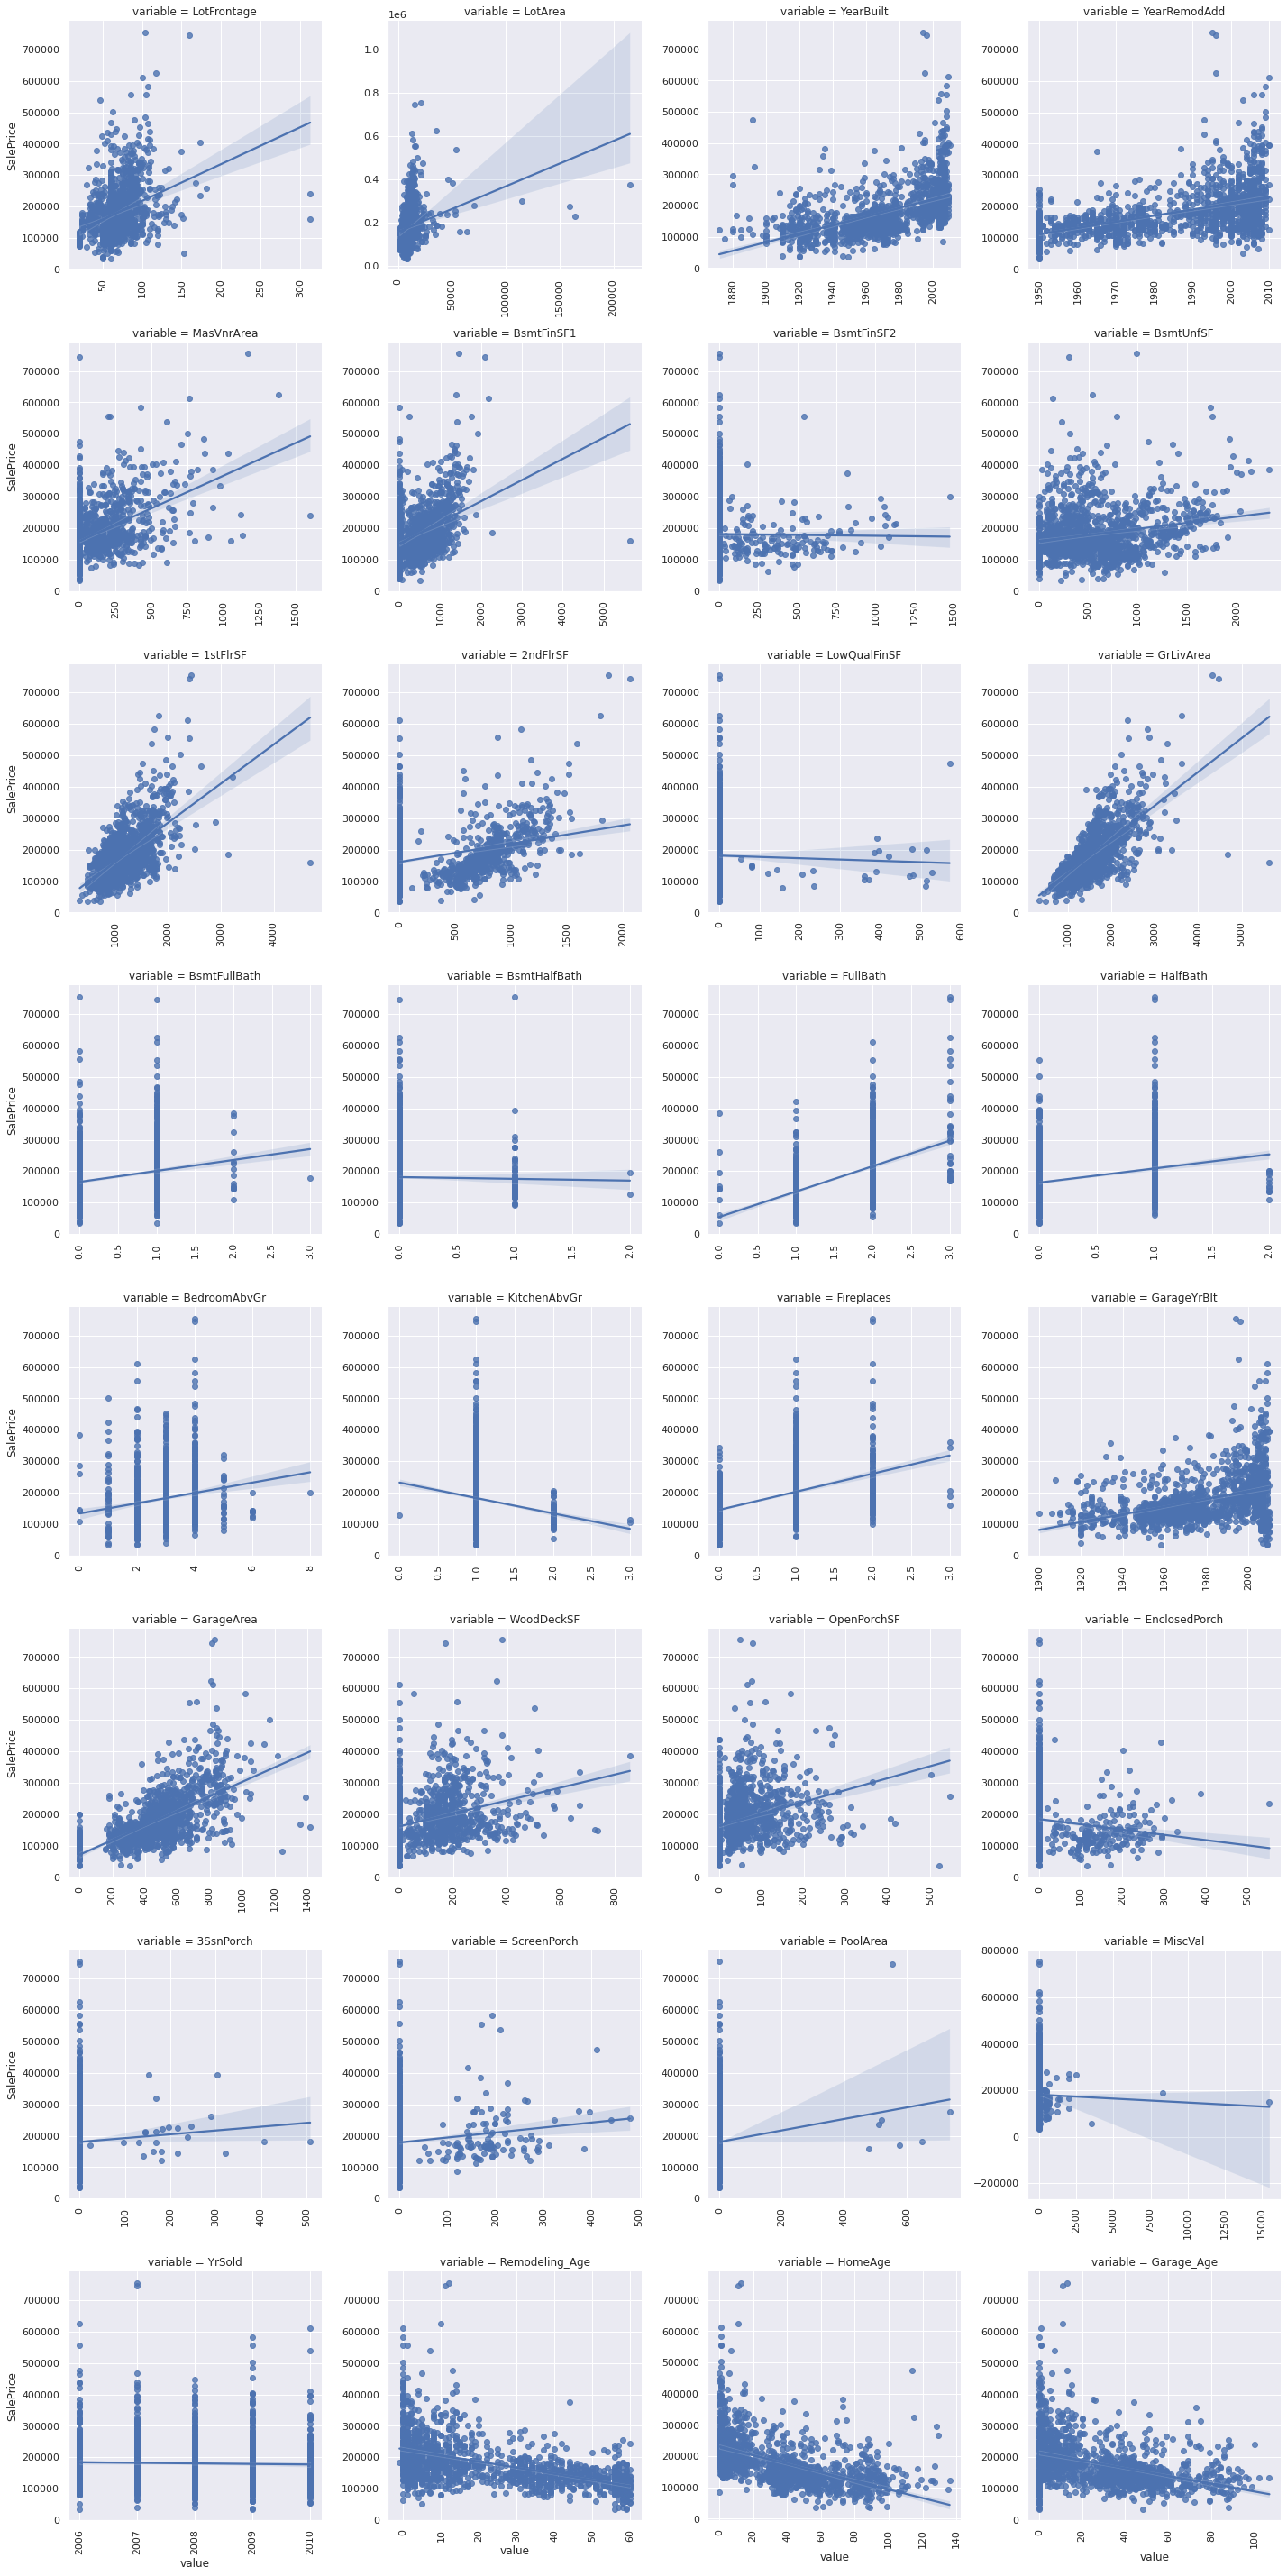

In [18]:
def scatterplot(x,y,**kwargs):
    sns.regplot(x=x,y=y)
    _=plt.xticks(rotation=90)

f = pd.melt(X, id_vars=['SalePrice'], value_vars=num_feat)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, height=5)
g = g.map(scatterplot, "value", "SalePrice")

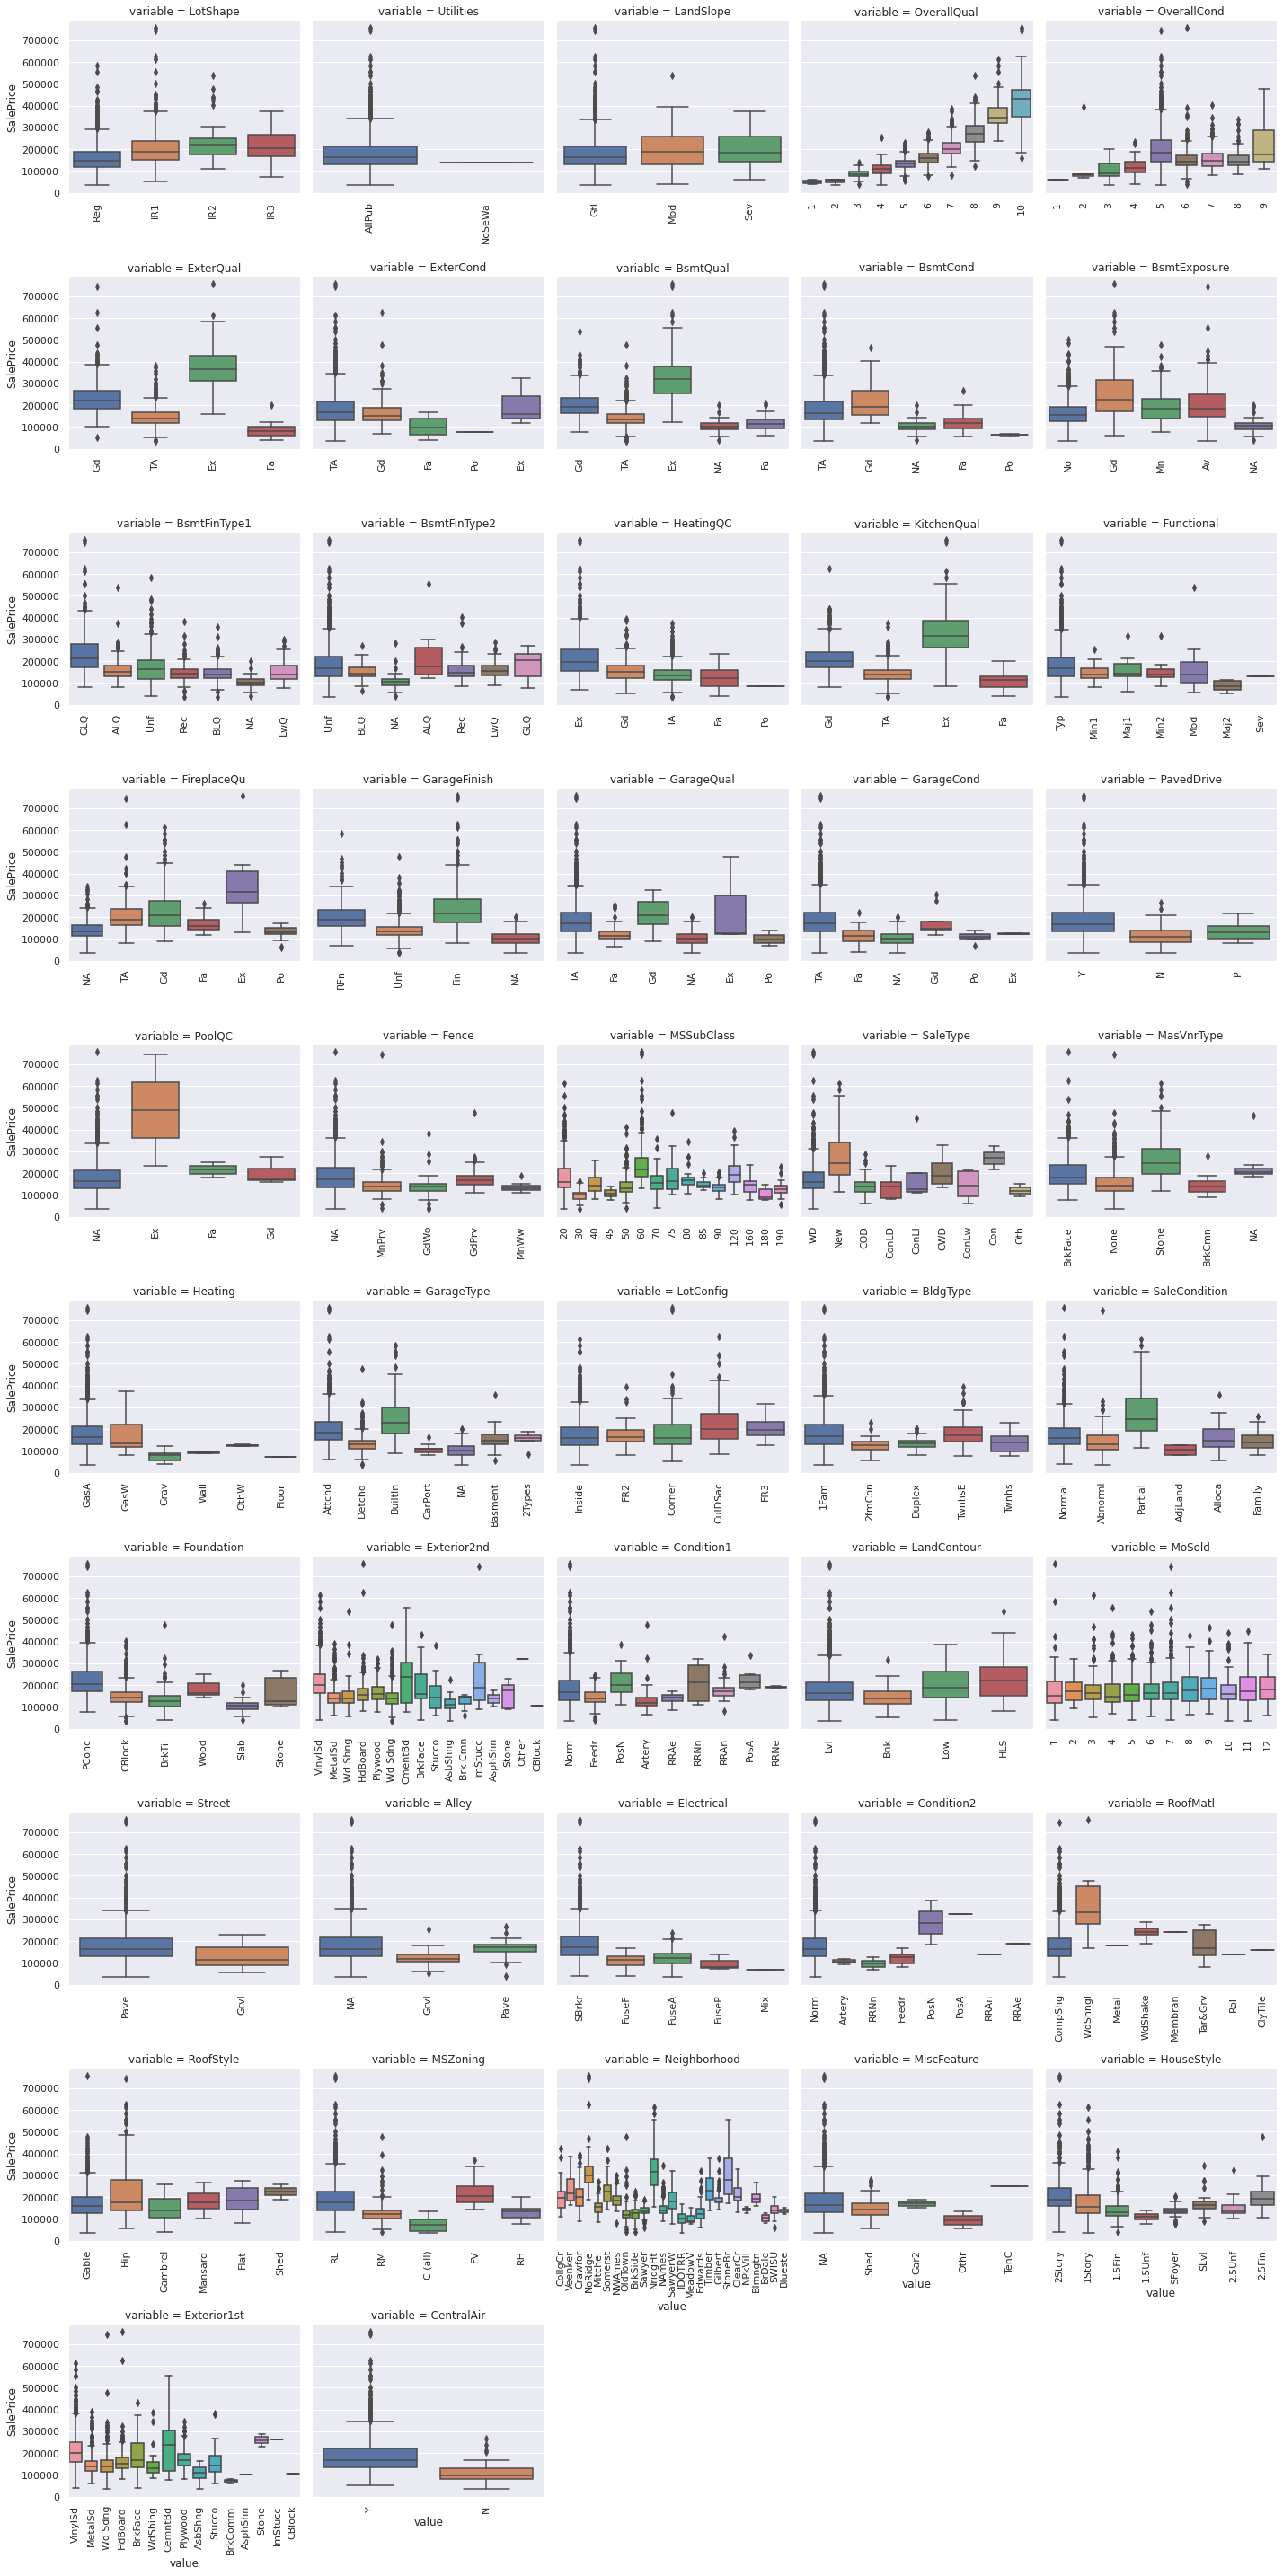

In [19]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    _=plt.xticks(rotation=90)

f = pd.melt(X, id_vars=['SalePrice'], value_vars=cat_feat)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=True, height=4)
g = g.map(boxplot, "value", "SalePrice")

In [20]:
X.drop([target_name], axis=1, inplace=True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import clone

scalar = RobustScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
ordi = OrdinalEncoder(categories=ord_cats)

cat_trf = ColumnTransformer([
    ('Nominal', ohe, [x for x in range(ord_feat_end, nom_feat_end)]),
    ('Ordinal', ordi, [x for x in range(num_feat_end, ord_feat_end)])
], remainder='passthrough')

num_trf = ColumnTransformer([
    ('Scaling', scalar, [x for x in range(ord_feat_end)])
], remainder='passthrough')

preprocessor = make_pipeline(cat_trf, num_trf)

data_train, data_test, target_train, target_test = train_test_split(
    X, np.log(target), test_size=0.1, random_state=42)

In [22]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

model = make_pipeline(clone(preprocessor), Ridge())

Ridge_param = {
    'ridge__solver': ['svd', 'cholesky', 'lsqr', 'sag'],
    'ridge__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'ridge__fit_intercept': [True, False],
    'ridge__normalize': [True, False]
}

R = GridSearchCV(model, Ridge_param, cv=5)
R.fit(data_train, target_train)
R_best= R.best_estimator_
# R = make_pipeline(clone(preprocessor), Ridge(alpha=10, fit_intercept=True, normalize=False, solver='svd'))
# R.fit(data_train, target_train)

In [23]:
from lightgbm import LGBMRegressor

model_LGB = make_pipeline(clone(preprocessor), LGBMRegressor())

LGB_param = {
    'lgbmregressor__boosting_type': ['gbdt', 'rf'],
    'lgbmregressor__learning_rate': [0.1, 0.12, 0.15, 0.17, 0.2]
}

LGB = GridSearchCV(model_LGB, LGB_param, cv=5)
LGB.fit(data_train, target_train)
LGB_best = LGB.best_estimator_
# LGB = make_pipeline(clone(preprocessor), LGBMRegressor(boosting_type='gbdt', learning_rate=0.1))
# LGB.fit(data_train, target_train)

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check 

In [24]:
from sklearn.linear_model import Lasso

model_L = make_pipeline(clone(preprocessor), Lasso())

Lasso_param = {
    'lasso__selection': ['cyclic', 'random'],
    'lasso__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'lasso__fit_intercept': [True, False],
    'lasso__normalize': [True, False]
}

L = GridSearchCV(model_L, Lasso_param, cv=5)
L.fit(data_train, target_train)
L_best = L.best_estimator_
# L = make_pipeline(clone(preprocessor), Lasso(alpha=0.001, fit_intercept=True, normalize=False, selection='random'))
# L.fit(data_train, target_train)

In [25]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model_HGB = make_pipeline(clone(preprocessor), HistGradientBoostingRegressor())

HGB_param = {
    'histgradientboostingregressor__loss' : ['squared_error', 'absolute_error', 'poisson'],
    'histgradientboostingregressor__learning_rate' : [0.1, 0.12, 0.15, 0.17, 0.2],
    'histgradientboostingregressor__min_samples_leaf' : [13, 15, 17, 20]
}

HGB = GridSearchCV(model_HGB, HGB_param, cv=5)
HGB.fit(data_train, target_train)
HGB_best = HGB.best_estimator_
# HGB = make_pipeline(clone(preprocessor), HistGradientBoostingRegressor(learning_rate=0.1, loss='poisson', min_samples_leaf=20))
# HGB.fit(data_train, target_train)

In [26]:
from xgboost import XGBRegressor

model_XGB = make_pipeline(clone(preprocessor), XGBRegressor())

XGB_param = {
        'xgbregressor__min_child_weight': [1, 5],
        'xgbregressor__eta': [0.1, 0.3, 0.5],
        'xgbregressor__gamma': [0, 0.2, 0.5],
        'xgbregressor__subsample': [0.5, 1.0],
        'xgbregressor__max_depth': [3, 6, 8],
        'xgbregressor__tree_method': ['auto']
        }

XGB = GridSearchCV(model_XGB, XGB_param, cv=5)
XGB.fit(data_train, target_train)
XGB_best = XGB.best_estimator_
# XGB = make_pipeline(clone(preprocessor), XGBRegressor(eta=0.1, gamma=0, max_depth=6, min_child_weight=5, subsample=0.5, tree_method='auto'))
# XGB.fit(data_train, target_train)

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

model_ADB_D = make_pipeline(clone(preprocessor), AdaBoostRegressor())

ADB_param_D = {
    'adaboostregressor__base_estimator': [DecisionTreeRegressor()],
    'adaboostregressor__base_estimator__max_depth': [8, 12, 15],
    'adaboostregressor__n_estimators': [150],
    'adaboostregressor__loss': ['linear', 'square', 'exponential']
}

ADB_D = GridSearchCV(model_ADB_D, ADB_param_D, cv=5)
ADB_D.fit(data_train, target_train)
ADB_D_best = ADB_D.best_estimator_
# ADB_D = make_pipeline(clone(preprocessor), AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12), loss='square', n_estimators=150))
# ADB_D.fit(data_train, target_train)

In [29]:
from sklearn.ensemble import VotingRegressor

VR = VotingRegressor(estimators=[('R', R_best), ('L', L_best), ('LGB', LGB_best), ('HGB', HGB_best), ('XGB', XGB_best), ('ADB_D', ADB_D_best)])
VR.fit(data_train, target_train)

VotingRegressor(estimators=[('R',
                             Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('columntransformer-1',
                                                               ColumnTransformer(remainder='passthrough',
                                                                                 transformers=[('Nominal',
                                                                                                OneHotEncoder(handle_unknown='ignore'),
                                                                                                [55,
                                                                                                 56,
                                                                                                 57,
                                                                                                 58,
                                                                     

In [30]:
models = [R, L, LGB, HGB, XGB, ADB_D, VR]
model_names = ['Ridge', 'Lasso', 'LGB', 'HGB', 'XGB', 'ADB_D', 'VR']

In [31]:
from sklearn.metrics import mean_squared_log_error

out = pd.DataFrame(np.exp(target_test))
RMSLE = pd.DataFrame()

for i, m in enumerate(models):
    sub = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv').drop(['SalePrice'], axis=1)
#     print(f'{model_names[i]} best score: {m.best_score_}')
#     print(f'{model_names[i]} best parameters: {m.best_params_}')
#     print('-----------------------------------------------')
    out[f'Pred_{model_names[i]}'] = np.exp(m.predict(data_test))
    out[f'Residual_{model_names[i]}'] = out['SalePrice'] - out[f'Pred_{model_names[i]}']
    out[f'%Diff_{model_names[i]}'] = np.absolute(out[f'Residual_{model_names[i]}']/out['SalePrice']*100)
    RMSLE[model_names[i]] = [np.sqrt((mean_squared_log_error(out['SalePrice'], out[f'Pred_{model_names[i]}'])))]
    sub['SalePrice'] = np.exp(m.predict(to_predict))
    sub.to_csv(f'my submission {model_names[i]}.csv', index=False)

In [32]:
out.sort_index(axis=1, inplace=True)
display(out.describe())
display(RMSLE)

,%Diff_ADB_D,%Diff_HGB,%Diff_LGB,%Diff_Lasso,%Diff_Ridge,%Diff_VR,%Diff_XGB,Pred_ADB_D,Pred_HGB,Pred_LGB,...,Pred_VR,Pred_XGB,Residual_ADB_D,Residual_HGB,Residual_LGB,Residual_Lasso,Residual_Ridge,Residual_VR,Residual_XGB,SalePrice
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,8.808290,8.360182,8.657077,8.525568,8.573255,7.578174,8.227680,180174.481791,181787.204411,180862.702514,...,180027.346495,178613.343750,2694.867525,1082.144904,2006.646801,3607.416147,1531.408057,2842.002820,4256.010274,182869.349315
std,13.194290,12.508875,11.589222,8.803526,8.658232,9.658116,8.056307,82418.373185,83879.067187,82005.037205,...,81575.958303,78258.195312,27961.350589,31667.228966,32645.080780,28267.840981,24031.967486,27596.678944,32095.123922,95914.811747
min,0.000000,0.089425,0.014351,0.104629,0.030128,0.004529,0.023745,58500.000000,54615.170107,56146.824754,...,53792.297826,51257.578125,-132957.000000,-155286.667868,-121354.690878,-80415.914633,-100415.896747,-112776.661098,-103359.875000,35311.000000
25%,2.349722,2.017598,2.387311,3.223432,3.013550,2.282060,3.125703,127951.251193,122898.061867,126657.342083,...,126338.024201,127295.832031,-6692.088514,-8904.759944,-8624.140234,-8997.745316,-10032.383374,-5105.380474,-9332.414062,127000.000000
50%,4.852817,5.101528,6.042602,5.734557,6.431006,4.545329,6.313614,149808.639545,156398.707310,150368.002299,...,153747.543427,153290.250000,-55.193558,-317.029541,550.791987,1548.884651,1487.949030,582.231800,1133.332031,153950.000000
75%,10.619384,10.330136,9.889011,11.276306,11.689300,8.449162,10.808809,213517.420414,212291.563694,208202.466805,...,208770.499593,210010.078125,10449.730342,7996.940437,10062.555577,9410.402516,10529.416185,8998.388216,10935.541016,212250.000000
max,126.558296,115.521652,101.574623,68.378518,49.444274,78.030010,50.306838,625000.000000,513359.410302,502164.926440,...,576625.629374,498970.968750,145157.000000,241640.589698,252835.073560,209324.590642,155180.142490,178374.370626,256029.031250,755000.000000


,Ridge,Lasso,LGB,HGB,XGB,ADB_D,VR
0,0.115589,0.117336,0.127756,0.12735,0.112269,0.131859,0.111738


<AxesSubplot:>

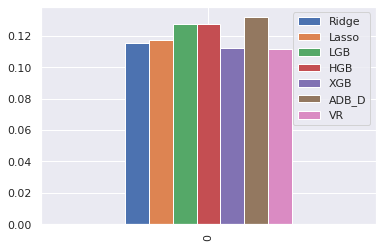

In [33]:
RMSLE.plot.bar()

Best submission RMSLE score is 0.12478 which was given by VotingRegressor indicating Voting Ensemble improved the overall performance (top 13% at the time).